# Installing Packages and Prerequisite Dependencies

In [27]:
%pip install numpy
%pip install scikit-image
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install tensorflow==2.10

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from setup import load_images, split as dataSplit, encodeLabel;
from performance import printConfMtx;
from Models import Model;
import constants;
import numpy as np;
import pandas as pd;

# Data Preparation for Classification - stonefly dataset

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


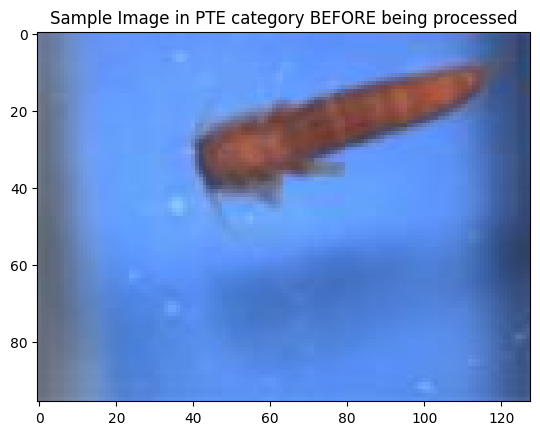

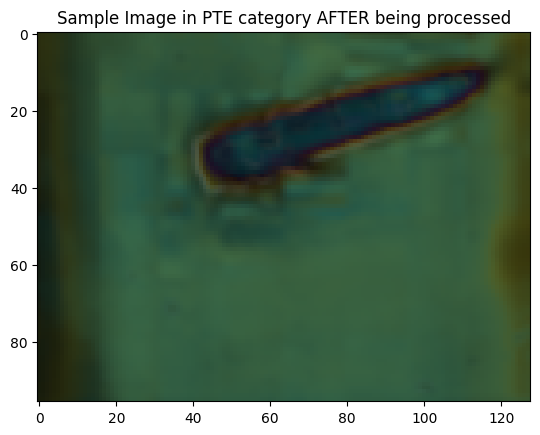

Total number of samples in the training set: 1089
Total number of labels in the training set: 1089
Unique labels in the training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the validation set: 273
Total number of labels in the validation set: 273
Unique labels in the validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [3]:
images, y = load_images(dataset=constants.STONEFLY, setName=constants.set0);
X_train, X_validation, y_train, y_validation = dataSplit(images, y);
# inspect the data
print(f"Total number of samples in the training set: {len(X_train)}");
print(f"Total number of labels in the training set: {len(y_train)}");
print(f"Unique labels in the training set: {np.unique(y_train)}");
print(f"Total number of samples in the validation set: {len(X_validation)}");
print(f"Total number of labels in the validation set: {len(y_validation)}");
print(f"Unique labels in the validation set: {np.unique(y_validation)}");

In [4]:
# save training set and validation set data for easier debugging
np.save("X_train.npy", X_train);
np.save("X_validation.npy", X_validation);
np.save("y_-train.npy", y_train);
np.save("y_validation.npy", y_validation);

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


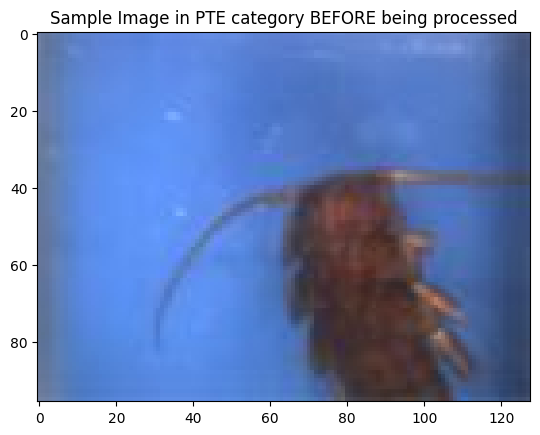

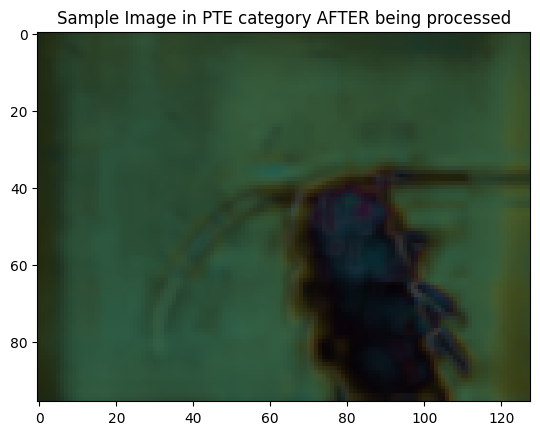

Total number of samples in the test set: 1480
Total number of labels in the test set: 1480
Unique labels in the test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [5]:
X_test, y_test = load_images(dataset=constants.STONEFLY, setName=constants.set1);
print(f"Total number of samples in the test set: {len(X_test)}");
print(f"Total number of labels in the test set: {len(y_test)}");
print(f"Unique labels in the test set: {np.unique(y_test)}");

In [6]:
# save the test set data for easier debugging
np.save("X_test.npy", X_test);
np.save("y_test.npy", y_test);

# Basic Transfer Learning: Classification

## ResNet Classification

In [7]:
# Load the data from .npy files
X_train = np.load("X_train.npy");
y_train = np.load("y_-train.npy");
X_validation = np.load("X_validation.npy");
y_validation = np.load("y_validation.npy");
X_test = np.load("X_test.npy");
y_test = np.load("y_test.npy");

### Understanding the Features

In [8]:
# Training set
images = pd.Series(y_train);
images.value_counts()

zap    178
dor    143
hes    136
iso    136
yor    134
cal    133
swe    123
pte     71
mos     35
Name: count, dtype: int64

In [9]:
# Validation set
images = pd.Series(y_validation);
images.value_counts()

zap    45
dor    36
yor    34
hes    34
iso    34
cal    33
swe    30
pte    18
mos     9
Name: count, dtype: int64

In [10]:
# Test set
images = pd.Series(y_test);
images.value_counts()

yor    290
hes    200
iso    200
dor    194
swe    185
cal    171
zap    150
pte     55
mos     35
Name: count, dtype: int64

### Load the Model

In [11]:
model = Model();
model.build_classifier();

INFO:tensorflow:Assets written to: ram://531a73a1-77bd-4e6a-a6d8-81d442feba06/assets


INFO:tensorflow:Assets written to: ram://531a73a1-77bd-4e6a-a6d8-81d442feba06/assets


INFO:tensorflow:Assets written to: ram://b33bf143-25e8-4915-807a-ff837abd1af4/assets


INFO:tensorflow:Assets written to: ram://b33bf143-25e8-4915-807a-ff837abd1af4/assets


Now let's observe a summary of our classifiers.

In [12]:
model.resnet50.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,686,913
Trainable params: 2,099,201
Non-trainable params: 23,587,712
_________________________________________

In [13]:
model.resnet50V2.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_______________________________________

### Train the Classifiers

#### resnet50

Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/10
35/35 [==============================] - 10s 132ms/step - loss: -69.5129 - accuracy: 0.1313 - val_loss: -170.8126 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 3s 72ms/step - loss: -327.3559 - accuracy: 0.1313 - val_loss: -562.8571 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 3s 72ms/step - loss: -850.4282 - accuracy: 0.1313 - val_loss: -1253.0791 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 3s 72ms/step - loss: -1712.0768 - accuracy: 0.1313 - val_loss: -2300.8083 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 3s 72ms/step - loss: -2923.4751 - accuracy: 0.1313 - val_loss: -3690.1660 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 3s 72ms/step - loss: -4458.6245 - accuracy: 0.1313 - val_loss: -5381.9990 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 3s 73ms/step - loss: -6368.7773 - accuracy: 0.1313 - val_l

INFO:tensorflow:Assets written to: ram://9533bbac-df14-4164-8acd-6844bc7506e6/assets


INFO:tensorflow:Assets written to: ram://9533bbac-df14-4164-8acd-6844bc7506e6/assets


INFO:tensorflow:Assets written to: ram://4e30cb5c-f1cd-4a77-bd6e-8852dd26016a/assets


INFO:tensorflow:Assets written to: ram://4e30cb5c-f1cd-4a77-bd6e-8852dd26016a/assets


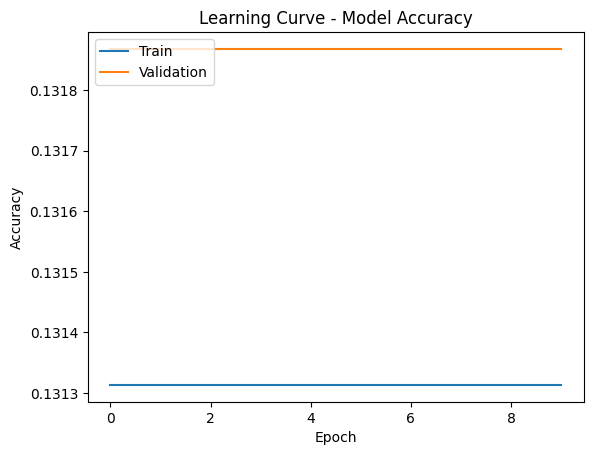

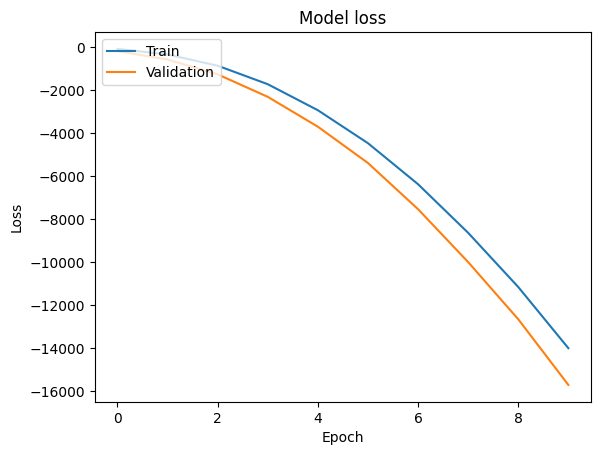

In [14]:
# resnet50
history_resnet50 = model.train(
    model.resnet50,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

Evaluate the Model

In [ ]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -15664.2421875
Validation Binary Cross-Entropy error: -15713.4140625
Testing Binary Cross-Entropy error: -15483.7177734375


([-15664.2421875, 0.13131313025951385],
 [-15713.4140625, 0.1318681389093399],
 [-15483.7177734375, 0.13108107447624207])

#### resnet50V2

Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]
Epoch 1/10


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35/35 [==============================] - 8s 124ms/step - loss: -717.6608 - accuracy: 0.1359 - val_loss: -1920.9176 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 2s 68ms/step - loss: -3863.9788 - accuracy: 0.1313 - val_loss: -6893.4253 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 2s 69ms/step - loss: -10644.2705 - accuracy: 0.1313 - val_loss: -15917.7549 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 2s 70ms/step - loss: -21660.2461 - accuracy: 0.1313 - val_loss: -29349.5703 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 2s 71ms/step - loss: -36861.8555 - accuracy: 0.1313 - val_loss: -46841.4336 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 2s 71ms/step - loss: -56134.9219 - accuracy: 0.1313 - val_loss: -68396.4141 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 2s 68ms/step - loss: -79267.4531 - accuracy: 0.1313 - val

INFO:tensorflow:Assets written to: ram://798c3d42-4b2e-4629-acd8-f15fc211a9ff/assets


INFO:tensorflow:Assets written to: ram://798c3d42-4b2e-4629-acd8-f15fc211a9ff/assets


INFO:tensorflow:Assets written to: ram://5560ff34-6498-4067-9a1b-7ee0fce15262/assets


INFO:tensorflow:Assets written to: ram://5560ff34-6498-4067-9a1b-7ee0fce15262/assets


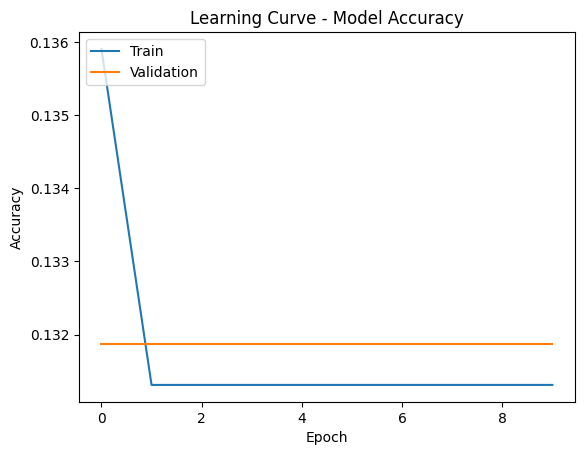

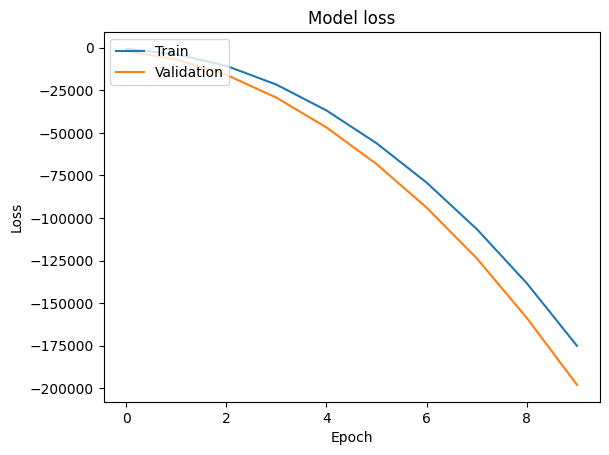

In [16]:
# resnet50V2
history_resnet50V2 = model.train(
    model.resnet50V2,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

Evaluate the Model

In [ ]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50V2,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -196070.09375
Validation Binary Cross-Entropy error: -198080.609375
Testing Binary Cross-Entropy error: -158969.484375


([-196070.09375, 0.13131313025951385],
 [-198080.609375, 0.1318681389093399],
 [-158969.484375, 0.13108107447624207])

### Make Prediction on the Test Set

#### resnet50

In [18]:
# resnet50
y_pred_resnet50_train = model.predict(model.resnet50, X_train);
y_pred_resnet50_val = model.predict(model.resnet50, X_validation);
y_pred_resnet50_test = model.predict(model.resnet50, X_test);

35/35 [==============================] - 3s 55ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
3/9 [=========>....................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 54ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
 1/47 [..............................] - ETA: 1s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 3s 55ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### resnet50V2

In [19]:
# resnet50V2
y_pred_resnet50V2_train = model.predict(model.resnet50V2, X_train);
y_pred_resnet50V2_val = model.predict(model.resnet50V2, X_validation);
y_pred_resnet50V2_test = model.predict(model.resnet50V2, X_test);

35/35 [==============================] - 2s 52ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
3/9 [=========>....................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 51ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
 1/47 [..............................] - ETA: 1s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 2s 52ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Performance Evaluation

Print the Confusion Matrix

#### resnet50

In [20]:
# training set
confMtx_resnet50_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50_train
);
confMtx_resnet50_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [21]:
# validation set
confMtx_resnet50_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50_val
);
confMtx_resnet50_val

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [22]:
# test set
confMtx_resnet50_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50_test
);
confMtx_resnet50_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


#### resnet50V2

In [23]:
# training set
confMtx_resnet50V2_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50V2_train
);
confMtx_resnet50V2_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [24]:
# validation set
confMtx_resnet50V2_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50V2_val
);
confMtx_resnet50V2_val

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [25]:
# test set
confMtx_resnet50V2_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50V2_test
);
confMtx_resnet50V2_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


## Discussion

From the learning curves, we can see that:
- ResNet50 classifier was trained with a flat accuracy when the number of epochs were enlarging, in both training and validation sets.
- ResNet50 classifier gives a higher accuracy on the validation set than the training set. This reveals the issue of underfitting, since the training data failed to generalize the model well, with a lower accuracy.
- ResNet50V2 classifier was trained with a decreasing accuracy (in the training set) and a flat accuracy (in the validation set), when the number of epochs were enlarging. 
- The accuracy of ResNet50V2 classifier in the training set dropped to a point and then remained flat starting at a specific number of epochs.
- When the accuracy of a model remains flat, this means a model failing to learn meaningful patterns in the data.
- Meanwhile, the losses of both models in both the training and the validation set data dropped significantly when the number of epochs were enlarging. This is a good sign because we are certain that by enlarging the number of epochs used to train a model can 

From the confusion matricies, we can see that:
- Both classifiers give predictions (based on any set of data) all being from the same label. 
- Such observation is a sign of class imbalance where there exist biases in the training, validation or even the test data.

As a result of the models failing to learn patterns from the data when the number of epochs is large enough, it is therefore a sign of underfitting. 